# BHZ model exercises

## $H$ spectrum

In [16]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt

In [22]:
def Hamiltonian(k1,k2,M,consts):
    """
    Effective H diagonal block
    """
    # initialize
    [A,B,C,D] = consts
    H = np.zeros((2,2),dtype=complex)
    
    # fill up
    H[0,0] = M + C - (D + B) * (k1**2 + k2**2)
    H[1,0] = A * (k1 + 1j*k2)
    H[0,1] = H[1,0].conj()
    H[1,1] = -M + C - (D - B) * (k1**2 + k2**2)

    return H

In [23]:
def Heff(k1,k2,M,consts):
    """
    Effective Hamiltonian
    """
    # get top left
    H_00 = Hamiltonian(k1,k2,M,consts)
    
    # get bottom right
    H_11 = Hamiltonian(-k1,-k2,M,consts).conj()

    # make Heff
    H = block_diag(H_00, H_11)
    
    return H

In [34]:
def Energy(k1,k2,M,consts):
    """
    Eigenvalues of H
    """
    # get eigenvalues
    H = Heff(k1,k2,M,consts)
    energies = np.linalg.eigvalsh(H)
    
    return energies

In [107]:
resolution = 501
factor = 4
k1 = k2 = np.linspace(-np.pi,np.pi,num=resolution,endpoint=True)

def Energy(k1,k2,M,consts,resolution=101,factor=4):
    """
    Energies of H for array-like inputs
    """
    energies = np.zeros((resolution,resolution),dtype=float)
    for i in range(resolution): # k1
        for j in range(resolution): # k2
            Ham = Heff(k1[i],k2[j],M,consts)
            energiesi = np.linalg.eigvalsh(Ham)[0]
            energies[i,j] = energiesi
    return energies

In [111]:
K1,K2=np.meshgrid(k1,k2)
E = Energy(k1,k2,0.1,[3,1,0,0],resolution=resolution)

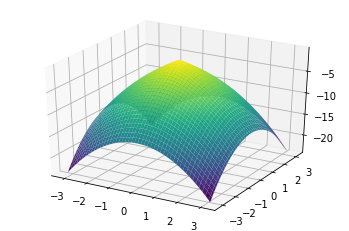

In [112]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(K1, K2, E,cmap="viridis")

plt.show()

# Dispersion of models

We now turn to the "full" model, i.e the one with sines and cosines. This can be done easily on Mathematica. We'll want to simulate the real space model for this as well. To recap, there are three models:

- Linear (lowest order in k)
- Full (all orders of k)
- Real space (inverse fourier transformed Full)

moreover, each of these models can have a magnetic field included in it. Here is the Real space model.

\begin{align}
        H_{B H Z}=\sum_{\vec{r}}\left\{c_{\vec{r}}^{\dagger}\left[M \sigma_{z}+C\right] c_{\vec{r}}+\sum_{j=x,y}\left(c_{\vec{r}+\hat{e}_{j}}^{\dagger}e^{i\theta^j_{\vec{r}}}\left[B \sigma_{z}+i \frac{A}{2} \sigma_{j}+D\right] c_{\vec{r}}+\mathrm{h.c.}\right)\right\}
\end{align}

where $\theta^j_{\vec{r}}=\int_{\vec{r}}^{\vec{r}+\hat{e}_{j}} \vec{A} \cdot \overrightarrow{\mathrm{d} \ell}$, the Peierls phase picked up for hopping from site $\vec{r}$ to site $\vec{r}+\hat{e}_j$. In the Landau gauge $\vec{A}=Bx\hat{y}$, this amounts to $\theta^y_{\vec{r}}=Bxa$ and $\theta^x_{\vec{r}}=0$. We'll do something very similar to what was done for the SOTI.

## Partially FT

In [1]:
import bhz
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

In [3]:
all_ks, all_Es = bhz.spectrum_plots_edge(size=60)

In [4]:
all_ks = np.asarray(all_ks)
all_Es = np.asarray(all_Es)

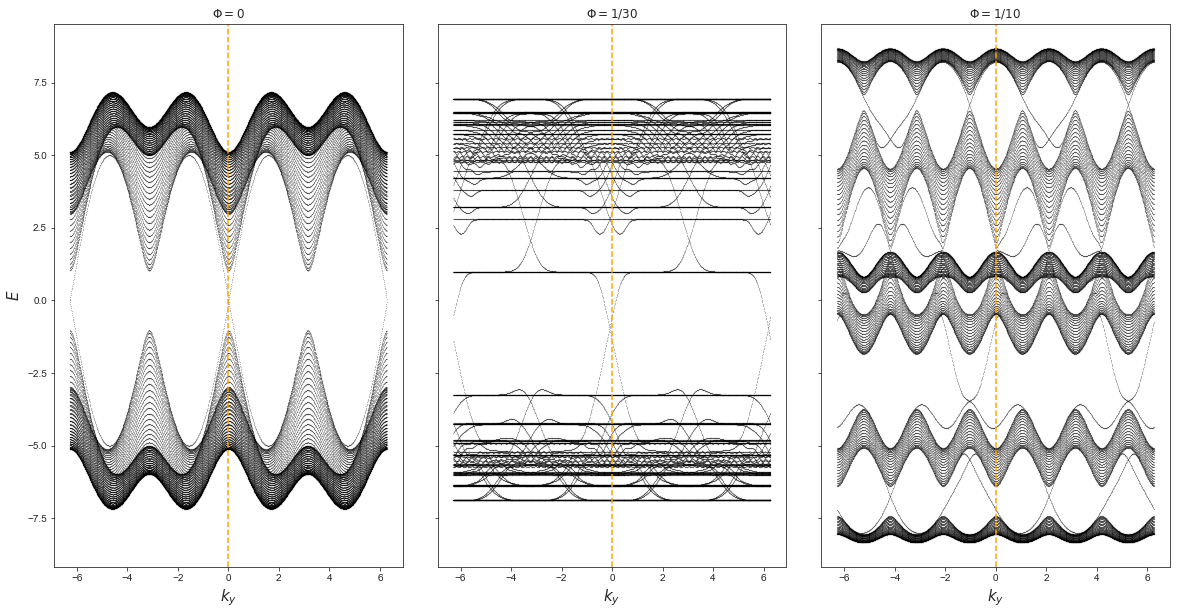

In [5]:
bhz.plot_spectrum(all_ks,all_Es)

In [723]:
H_pft = bhz.BHZ_edge_full(size=90, p=1, q=30)

In [729]:
H_trim = bhz.trim_magnetic_cell(H_pft,30,1)

In [730]:
H_trim.shape

(1800, 1800)

In [731]:
H_pft.shape

(16200, 16200)

In [725]:
Es_pft, Ws_pft = np.linalg.eigh(H_pft)

KeyboardInterrupt: 

### Butterfly

In [6]:
phis, eps = bhz.get_phis_eps(qmax=50,ucsize=3,ky=0,M=3,A=5,B=1,C=0,D=0)

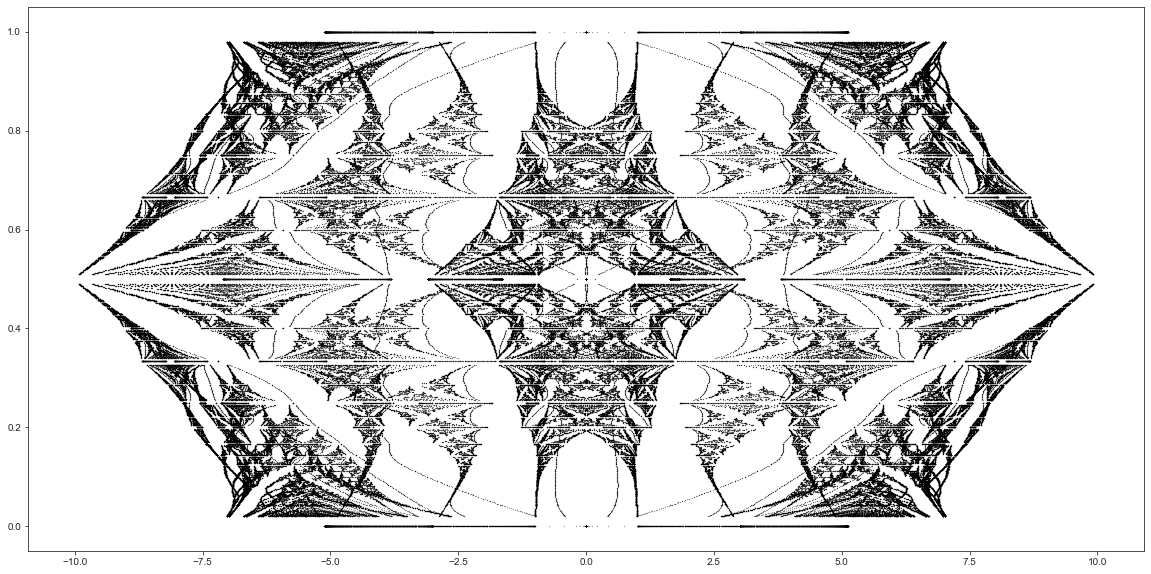

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(eps,phis,c='k',s=0.1,marker='.')
plt.show()

## Real space

In [363]:
import bhz as bhz
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [721]:
H_real = bhz.BHZ_real(size=90,p=1,q=30)

In [713]:
from numpy.linalg import eigh
Es,Ws=np.linalg.eigh(H_real)

In [621]:
np.savetxt("Energies_p1_q90.csv",Es)
np.savetxt("Wavefunctions_p1_q90.csv",Ws)

### Energies

In [614]:
Es_plateau, idx_p, counts_p = bhz.find_plateaus(Es)

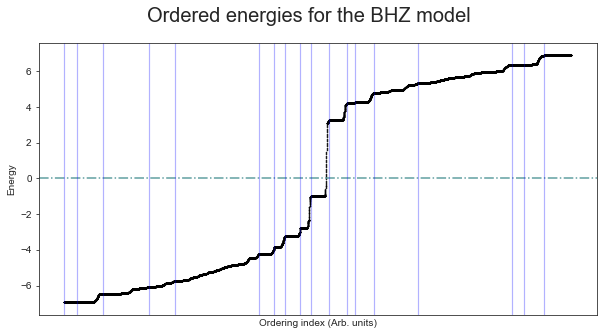

In [710]:
plt.figure(figsize=(10,5))
plt.suptitle("Ordered energies for the BHZ model",fontsize=20)
plt.ylabel("Energy")
plt.xlabel("Ordering index (Arb. units)")
plt.xticks([])
plt.scatter(np.arange(0,np.size(Es)),Es,c='k',marker='.',s=1)
plt.axhline(y=0,c='cadetblue',ls='-.')
for idx in idx_p:
    plt.axvline(x=idx,c='b',ls='-',linewidth=1.2, alpha=0.3)
#plt.axvline(x=idx_p[27],c='r',ls='-',linewidth=1.2, alpha=0.3)
plt.show()

In [699]:
np.argmin(abs(Es))

8359

In [700]:
len(Es)

16200

In [616]:
# arange energies by n
i0 = np.argmin(abs(Es_plateau))
# get stop on symmetric range
max_range = np.min([i0,len(Es_plateau)-i0])
Plateaus_ordered = np.zeros(len(Es_plateau),dtype=float)
Plateaus_ordered[0] = Es_plateau[i0]
for i in range(1,max_range):
    Plateaus_ordered[2*i-1] = Es_plateau[i0+i]
    Plateaus_ordered[2*i] = Es_plateau[i0-i]

# remove zeros
Plateaus_ordered = Plateaus_ordered[Plateaus_ordered != 0]

In [617]:
ns = np.zeros(len(Plateaus_ordered),dtype=float)
ns[0] = 0
for i in range(1,max_range):
    ns[2*i-1] = i
    ns[2*i] = i

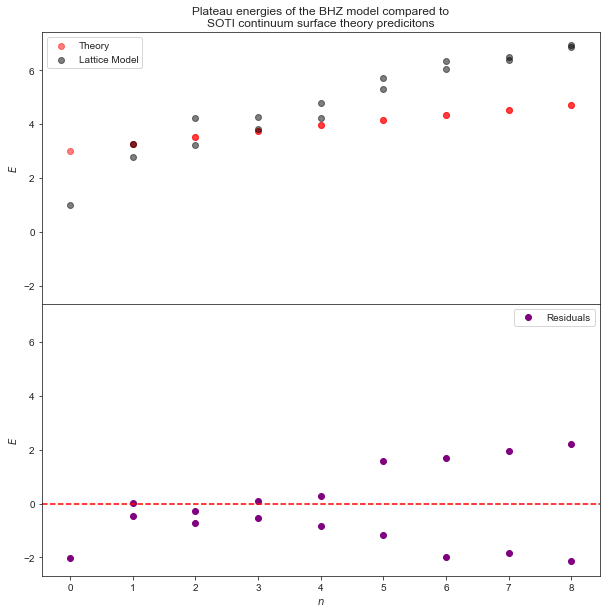

In [701]:
# plt.figure(figsize=(10,5))
# plt.suptitle("Plateau energies of the BHZ model compared to\nSOTI continuum surface theory predicitons")
# plt.scatter(ns,theoretical,c='r',alpha=0.5,label='Theory')
# plt.scatter(ns,Plateaus_ordered,c='k',label='Lattice Model')
# plt.ylabel("$E$")
# plt.xlabel("$n$")
# plt.legend()
# plt.show()

fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(10,10))
fig.subplots_adjust(hspace=0)

ax[0].set_title("Plateau energies of the BHZ model compared to\nSOTI continuum surface theory predicitons")
ax[0].scatter(ns,np.abs(theoretical),c='r',alpha=0.5,label='Theory')
ax[0].scatter(ns,np.abs(Plateaus_ordered),c='k',alpha=0.5,label='Lattice Model')
ax[0].set_ylabel("$E$")
ax[0].legend()

ax[1].scatter(ns,theoretical-Plateaus_ordered,c='purple',label='Residuals')
ax[1].axhline(y=0,c='r',ls='--')
ax[1].set_ylabel("$E$")
ax[1].set_xlabel("$n$")
ax[1].legend()

plt.show()

In [619]:
theoretical = theory(ns,1/30)

In [514]:
def theory(ns,Bfield,M=3,A=5,B=1,C=0,D=0):
    """
    Theoretical prediction for energy levels
    Do B and other parameters matter?
    """
    theoretical = np.zeros(len(ns),float)
    theoretical[0] = -M
    v0 = A
    Dsurf = M
    for i in range(1,max_range):
        n = ns[2*i]
        theoretical[2*i-1] = np.sqrt(Dsurf**2+2*v0**2*Bfield*n)
        theoretical[2*i] = -np.sqrt(Dsurf**2+2*v0**2*Bfield*n)
        
    return theoretical

### Wavefunctions

In [703]:
w=Ws[:,idx_p[9]]
wpos=np.arange(0,90)
w1r,w1i,w0r,w0i=bhz.split_full(w)

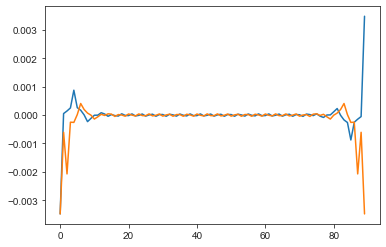

In [705]:
plt.plot(wpos,w0i[0::90])
plt.plot(wpos,w0r[0::90])

In [706]:
w=Ws[:,idx_p[9]+75]
wpos=np.arange(0,90)
w1r,w1i,w0r,w0i=bhz.split_full(w)

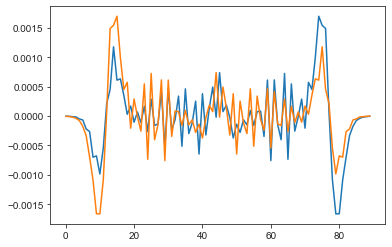

In [708]:
plt.plot(wpos,w0i[45::90])
plt.plot(wpos,w0r[45::90])

In [628]:
np.argmin(abs(Es_plateau))

9

In [693]:
psi = Ws[:,idx_p[9]]

In [694]:
p1r,p1i,p0r,p0i=bhz.split_full(psi)

In [695]:
pos = np.arange(0,90*90)
pos90 = np.arange(0,90)

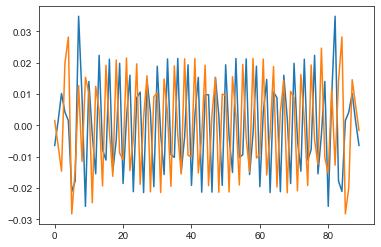

In [696]:
bump = 6
plt.figure()
plt.plot(pos90,p1r[90*bump:90*(bump+1)])
plt.plot(pos90,p1i[90*bump:90*(bump+1)])
plt.show()

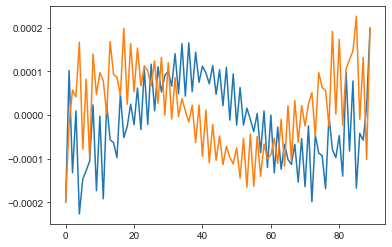

In [448]:
plt.figure()
plt.plot(np.arange(0,90),p0r[0:90])
plt.plot(np.arange(0,90),p0i[0:90])
plt.show()

In [328]:
pos=np.arange(0,H_real.shape[0])

In [385]:
waves_up, waves_down = bhz.split_spins(waves_plateau)
waves_up_re, waves_up_im = bhz.split_real_imaginary(waves_up)
waves_down_re, waves_down_im = bhz.split_real_imaginary(waves_down)

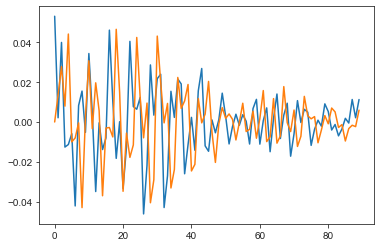

In [383]:
plt.figure()
plt.plot(np.arange(0,90),waves_up_re[0:90,27])
plt.plot(np.arange(0,90),waves_up_im[0:90,27])
plt.show()

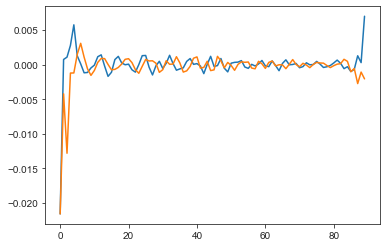

In [386]:
plt.figure()
plt.plot(np.arange(0,90),waves_down_re[0:90,27])
plt.plot(np.arange(0,90),waves_down_im[0:90,27])
plt.show()

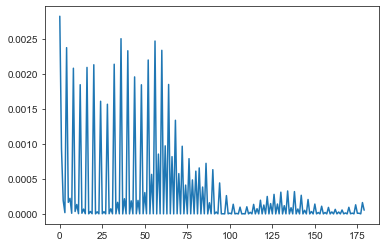

In [395]:
plt.figure()
plt.plot(np.arange(0,180),np.abs(waves_plateau[0:180,27])**2)
plt.show()

In [118]:
W_sq_batched_map = np.reshape(W_sq_batched,(100,100))

In [124]:
# make image array
# Ws.shape[0] = 10,000
spin_nos = 2
n = int(WsT.shape[0]/spin_nos)
m = int(n**(1/2))
image_map = np.zeros((n,m,m), dtype=float)
for i in range(n):
    prob_dist = batch_spins(WsT[i],spin_nos)
    image = prob_dist.reshape((m,m), order='C')
    image_map[i] = image

<IPython.core.display.Javascript object>


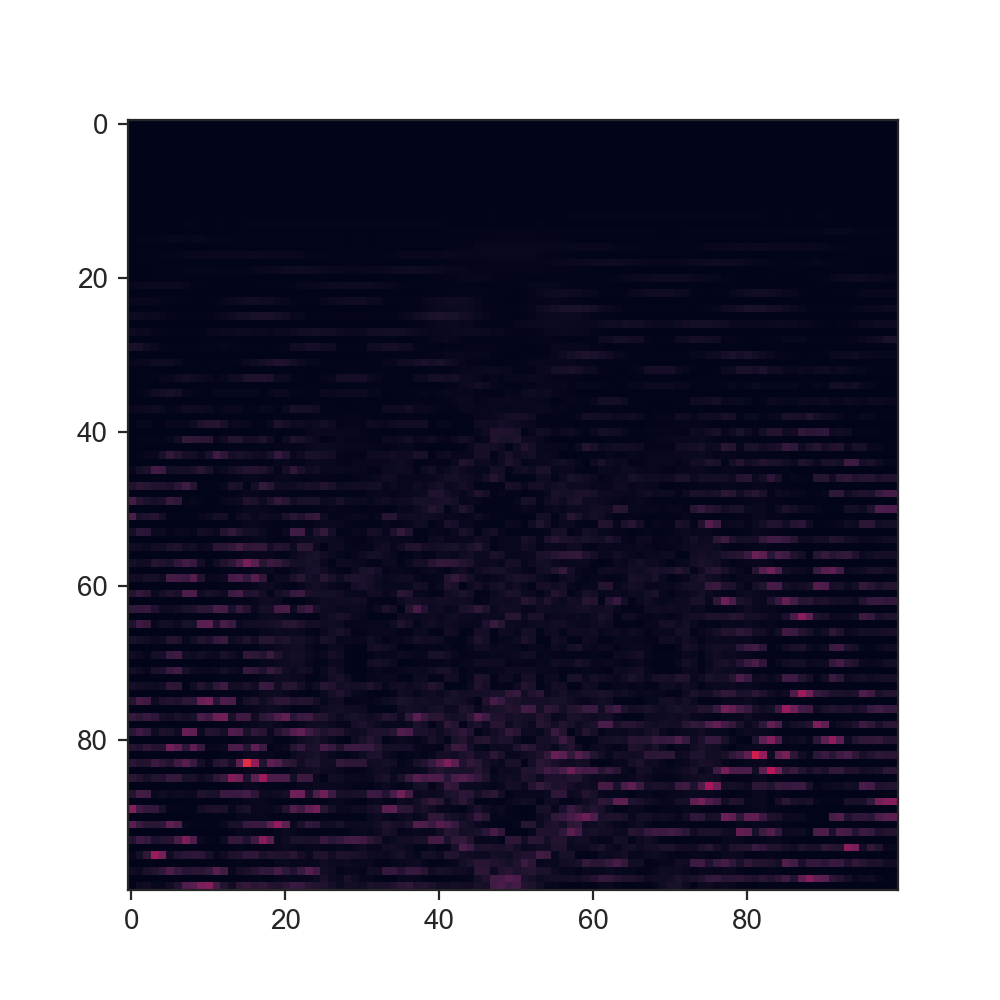

In [152]:
%matplotlib notebook
fig,ax = plt.subplots(figsize=(5,5))
i=0
im = ax.imshow(image_map[0,:,:], animated=True)
def updatefig(i):
    im.set_data(image_map[i,:,:])
    return [im]
ani = animation.FuncAnimation(fig, updatefig, interval = 1)
plt.draw()
plt.show()